In [3]:
!pip install scikit-learn

In [5]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 653.6 kB/s eta 0:01:01
   -- ------------------------------------- 2.6/39.5 MB 28.1 MB/s eta 0:00:02
   --- ------------------------------------ 3.4/39.5 MB 24.1 MB/s eta 0:00:02
   --- ------------------------------------ 3.9/39.5 MB 20.6 MB/s eta 0:00:02
   ---- ----------------------------------- 4.3/39.5 MB 18.2 MB/s eta 0:00:02
   ---- ----------------------------------- 4.7/39.5 MB 16.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.1/39.5 MB 15.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.6/39.5 MB 14.9 MB/s eta 0:00:03
   ------ --------------------------------- 6.1/39.5 MB 14.4 MB/s eta 0:00:03
   --

In [136]:
!pip install ttkthemes

     ---------------------------------------- 0.0/891.2 kB ? eta -:--:--
      ------------------------------------ 20.5/891.2 kB 330.3 kB/s eta 0:00:03
     - ----------------------------------- 30.7/891.2 kB 435.7 kB/s eta 0:00:02
     --- --------------------------------- 81.9/891.2 kB 573.4 kB/s eta 0:00:02
     -------------------------------------  890.9/891.2 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 891.2/891.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ttkthemes: filename=ttkthemes-3.2.2-cp311-cp311-win_amd64.whl size=1794008 sha256=0b7f6b6f291cb7fd7b6a1d98a59caa12153c1dbdb4ecaf884f25ad1d9b768c1c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\3e\6a\7a\32b372ddd40d19d476793521c693b2c0db7cfdcaff1c39ce2b
Successfully built ttkthemes


In [29]:
!pip install pytesseract

  Obtaining dependency information for pytesseract from https://files.pythonhosted.org/packages/7a/33/8312d7ce74670c9d39a532b2c246a853861120486be9443eebf048043637/pytesseract-0.3.13-py3-none-any.whl.metadata


In [1]:
import cv2
import numpy as np
import pandas as pd
import networkx as nx
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import Frame
from ttkthemes import ThemedTk
from tkinter import ttk
import tkinter as tk
import re

In [36]:
import cv2
import numpy as np
import pytesseract

def estimate_pixel_to_um(image_path):
    """
    Ëß£ÊûêÂúñÁâá‰∏≠ÁöÑÊØî‰æãÂ∞∫Ë≥áË®äÔºàOCR + ÂÇ≥Áµ±ÊñπÊ≥ïÔºâÔºåÁÑ°Ê≥ïË≠òÂà•Ââá‰ΩøÁî®È†êË®≠ÂÄº„ÄÇ
    """
    default_pixel_to_um = 0.01
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"‚ùå ÁÑ°Ê≥ïÂä†ËºâÂúñÁâá: {image_path}")

    # OCR ËÆÄÂèñÊØî‰æãÂ∞∫Êï∏ÂÄº
    roi = img[-50:, :]  # ÂèñÂúñÁâáÂ∫ïÈÉ®
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray, config="--psm 6")
    
    # ÂòóË©¶Ëß£Êûê OCR ÁµêÊûú
    import re
    match = re.search(r"([\d.]+)\s*(¬µm|nm|mm)", text, re.IGNORECASE)
    if match:
        scale_bar_length = float(match.group(1))
        unit = match.group(2).lower()
        if unit == "nm":
            scale_bar_length /= 1000  # ËΩâÊèõÊàê ¬µm
        elif unit == "mm":
            scale_bar_length *= 1000  # ËΩâÊèõÊàê ¬µm
        return scale_bar_length / img.shape[1]  # Ë®àÁÆó ¬µm/px

    print("‚ùå ÁÑ°Ê≥ïËß£ÊûêÊØî‰æãÂ∞∫Ôºå‰ΩøÁî®È†êË®≠ 1:1")
    return default_pixel_to_um


In [3]:
# ‰ΩøÁî® Otsu + ÂΩ¢ÊÄÅÂ≠¶Â§ÑÁêÜËøõË°åÂõæÂÉèÂàÜÂâ≤
def segment_image_otsu(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"ÂõæÂÉèÊú™ËÉΩÊ≠£Á°ÆÂä†ËΩΩÔºåËØ∑Ê£ÄÊü•Êñá‰ª∂Ë∑ØÂæÑÊàñÊ†ºÂºè: {image_path}")
    
    # Otsu ÈòàÂÄºÊ≥ï
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # ÂΩ¢ÊÄÅÂ≠¶Êìç‰Ωú - ÂéªÈô§Âô™Â£∞
    kernel = np.ones((3,3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    binary = cv2.dilate(binary, kernel, iterations=1)
    
    # Canny ËæπÁºòÊ£ÄÊµã
    edges = cv2.Canny(binary, 100, 200)
    return edges, binary

In [4]:
# È¢ÑÂ§ÑÁêÜÂõæÂÉèÂπ∂Ê£ÄÊµãÈ¢óÁ≤í
def detect_particles(image_path, pixel_to_um):
    edges, binary = segment_image_otsu(image_path)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    particle_data = []
    centroids = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] > 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            area_px = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            circularity = 4 * np.pi * area_px / (perimeter ** 2) if perimeter > 0 else 0
            area_um = area_px * (pixel_to_um ** 2)
            centroids.append((cx, cy))
            particle_data.append((cx, cy, area_um, circularity))
    return centroids, particle_data, binary

In [5]:
import math  # Â¶ÇÊûúÂ∞öÊú™ÂºïÁî® math Ê®°ÁµÑÔºåË´ãÂä†‰∏äÈÄô‰∏ÄË°å

def detect_tpb_points_improved(centroids, pixel_to_um, threshold_um=0.5, angle_threshold=30):
    """
    ÊîπÈÄ≤ÁâàÁöÑ TPB Ê™¢Ê∏¨ÂáΩÂºèÔºö
      - Ê†πÊìöË∑ùÈõ¢Èñ•ÂÄºÂª∫Á´ãÈÑ∞ËøëÈóú‰øÇ„ÄÇ
      - Â∞çÊØèÂÄãËàáËá≥Â∞ëÂÖ©ÂÄãÈÑ∞Â±ÖÈÄ£Êé•ÁöÑÁØÄÈªûÔºåË®àÁÆóÂæûË©≤ÁØÄÈªûÊåáÂêëÊØèÂÄãÈÑ∞Â±ÖÁöÑÂêëÈáèÔºå
        ‰∏¶Ë®àÁÆóÊâÄÊúâÂêëÈáè‰πãÈñìÁöÑÂ§æËßíÔºå‰ª•ÊúÄÂ∞èÂ§æËßí‰ΩúÁÇ∫ÂèØ‰ø°Â∫¶‰æùÊìö„ÄÇ
    
    ÂèÉÊï∏Ôºö
      centroids: list of (x, y) Á≤íÂ≠êË≥™ÂøÉ
      pixel_to_um: ÊØèÂÄãÂÉèÁ¥†‰ª£Ë°®Â§öÂ∞ë ¬µm
      threshold_um: ÈÑ∞ËøëË∑ùÈõ¢Èñ•ÂÄºÔºåÈ†êË®≠ 0.5 ¬µm
      angle_threshold: ËßíÂ∫¶ÈÅéÊøæÈñ•ÂÄºÔºå‰ΩéÊñºÊ≠§ÂÄºÂâáÂèØ‰ø°Â∫¶ÁÇ∫ 0ÔºàÂñÆ‰ΩçÔºöÂ∫¶Ôºâ
    
    ÂõûÂÇ≥Ôºö
      tpb_points: Ê™¢Ê∏¨Âà∞ÁöÑ TPB ÈªûÂàóË°®
      confidence_scores: ÊØèÂÄã TPB ÈªûÂ∞çÊáâÁöÑÂèØ‰ø°Â∫¶ÂàÜÊï∏Ôºà0ÔΩû1Ôºâ
    """
    threshold_px = threshold_um / pixel_to_um
    G = nx.Graph()
    
    # Âª∫Á´ãÈÑ∞ËøëÈóú‰øÇÔºåÂÉÖÊØîËºÉ‰∏ÄÊ¨° (i < j)
    for i, (x1, y1) in enumerate(centroids):
        for j, (x2, y2) in enumerate(centroids):
            if i < j:
                distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if distance < threshold_px:
                    G.add_edge(i, j)
    
    tpb_points = []
    confidence_scores = []
    for node in G.nodes:
        neighbors = list(G[node])
        if len(neighbors) >= 2:
            x0, y0 = centroids[node]
            vectors = []
            for n in neighbors:
                xn, yn = centroids[n]
                dx, dy = xn - x0, yn - y0
                norm = math.hypot(dx, dy)
                if norm > 0:
                    vectors.append((dx / norm, dy / norm))
            if len(vectors) < 2:
                continue
            
            angles = []
            for i in range(len(vectors)):
                for j in range(i+1, len(vectors)):
                    dot = np.clip(vectors[i][0] * vectors[j][0] + vectors[i][1] * vectors[j][1], -1.0, 1.0)
                    angle = math.degrees(math.acos(dot))
                    angles.append(angle)
            
            if angles:
                min_angle = min(angles)
                if min_angle < angle_threshold:
                    conf = 0.0
                else:
                    conf = min_angle / 90.0
                    conf = max(0.0, min(conf, 1.0))
                
                tpb_points.append(centroids[node])
                confidence_scores.append(conf)
    
    return tpb_points, confidence_scores


In [6]:
# ÂèØËßÜÂåñ TPB ÁªìÊûú
def visualize_tpb(image_path, centroids, tpb_points):
    img = cv2.imread(image_path)
    for (cx, cy) in centroids:
        cv2.circle(img, (cx, cy), 3, (0, 255, 0), -1)  # ÁªøËâ≤Ê†áËÆ∞È¢óÁ≤í
    for (tx, ty) in tpb_points:
        cv2.circle(img, (tx, ty), 3, (0, 0, 255), -1)  # Á∫¢Ëâ≤Ê†áËÆ∞ TPB
    output_path = "tpb_output.png"
    cv2.imwrite(output_path, img)
    return output_path

In [7]:
# ËÆ°ÁÆó TPB ÂØÜÂ∫¶
def calculate_tpb_density(tpb_points, image_shape, pixel_to_um):
    img_area_um2 = (image_shape[0] * pixel_to_um) * (image_shape[1] * pixel_to_um)
    unit_count = img_area_um2 / 10
    tpb_density = len(tpb_points) / unit_count if unit_count > 0 else 0
    return tpb_density

In [8]:
# ‰øùÂ≠òÊï∞ÊçÆÂà∞CSV
def save_tpb_data (particle_data, tpb_points):
    df = pd.DataFrame(particle_data, columns=["Centroid_X", "Centroid_Y", "Area_um2", "Circularity"])
    df_tpb = pd.DataFrame(tpb_points, columns=["TPB_X", "TPB_Y"])
    df.to_csv("particles.csv", index=False)
    df_tpb.to_csv("tpb_points.csv", index=False)

In [9]:
def plot_confidence_histogram(confidence_scores):
    """
    ÁªòÂà∂ÂÄôÈÄâ TPB ÁÇπÂèØ‰ø°Â∫¶ÂàÜÂ∏ÉÁõ¥ÊñπÂõæÔºåÂπ∂ËøîÂõû matplotlib ÁöÑ Figure ÂØπË±°„ÄÇ
    
    ÂèÇÊï∞Ôºö
      confidence_scores: list, ÊØè‰∏™ÂÄôÈÄâ TPB ÁÇπÁöÑÂèØ‰ø°Â∫¶ÂàÜÊï∞ÔºåÂÄº‰ªã‰∫é 0 Âà∞ 1 ‰πãÈó¥„ÄÇ
      
    ËøîÂõûÔºö
      fig: matplotlib.figure.Figure ÂØπË±°ÔºåÂèØ‰ª•Áî®‰∫éËøõ‰∏ÄÊ≠•ÂµåÂÖ•Âà∞ GUI ‰∏≠ÊòæÁ§∫„ÄÇ
    """
    import matplotlib.pyplot as plt  # Â¶ÇÊûú‰Ω†ËøòÊ≤°ÊúâÂØºÂÖ• matplotlibÔºåËØ∑Á°Æ‰øùËøôÈáåÂØºÂÖ•
    # ÂàõÂª∫‰∏Ä‰∏™Â§ßÂ∞è‰∏∫ 4x3 Ëã±ÂØ∏ÁöÑÂõæÂΩ¢
    fig, ax = plt.subplots(figsize=(4, 3))
    # ÁªòÂà∂Áõ¥ÊñπÂõæÔºåËÆæÂÆö 10 ‰∏™ÁÆ±Â≠êÔºåËåÉÂõ¥‰∏∫ 0 Âà∞ 1ÔºåËæπÊ°ÜÈ¢úËâ≤‰∏∫ÈªëËâ≤
    ax.hist(confidence_scores, bins=10, range=(0, 1), edgecolor='black')
    # ËÆæÁΩÆÂõæÂΩ¢Ê†áÈ¢òÂíåÂùêÊ†áËΩ¥Ê†áÁ≠æ
    ax.set_title("TPB ÁÇπÂèØ‰ø°Â∫¶ÂàÜÂ∏É")
    ax.set_xlabel("ÂèØ‰ø°Â∫¶")
    ax.set_ylabel("ÁÇπÁöÑÊï∞Èáè")
    # ËÆæÁΩÆ x ËΩ¥ÂàªÂ∫¶
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    return fig


In [10]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk  # Áî®‰∫éËøõÂ∫¶Êù°
from PIL import Image, ImageTk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import cv2
import numpy as np

# ÂÖ®Â±ÄÂèòÈáèÔºåÁî®‰∫éÂú®È°µÈù¢Èó¥‰º†ÈÄíÊï∞ÊçÆ
last_result_str = ""
last_processed_img_tk = None
last_original_img_tk = None
last_conf_scores = None
last_shape_counts = None

In [11]:
def plot_confidence_histogram(confidence_scores):
    """
    ÁªòÂà∂ TPB confidence distribution Áõ¥ÊñπÂõæ„ÄÇ
      - Ê†áÈ¢ò: "TPB confidence distribution"
      - X ËΩ¥: Confidence score
      - Y ËΩ¥: Number of TPB candidates
    """
    import matplotlib.pyplot as plt  # Á°Æ‰øù matplotlib Â∑≤ÂØºÂÖ•
    fig, ax = plt.subplots(figsize=(4,4))
    ax.hist(confidence_scores, bins=10, range=(0,1), edgecolor='black')
    ax.set_title("TPB confidence distribution", fontdict={'fontsize':14, 'fontweight':'bold'})
    ax.set_xlabel("Confidence score", fontsize=12)
    ax.set_ylabel("Number of TPB candidates", fontsize=12)
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    return fig

def show_progress_overlay(duration=3000, tip_text="Tips: Use a clear, high-resolution image for better analysis results.", bg_color="lightgray", alpha=1.0):
    """
    ÂàõÂª∫‰∏Ä‰∏™ Toplevel Á™óÂè£‰Ωú‰∏∫Ë¶ÜÁõñÂ±ÇÔºåÊòæÁ§∫ËøõÂ∫¶Êù°ÂíåÊèêÁ§∫‰ø°ÊÅØ„ÄÇ
    duration: ÊòæÁ§∫Êó∂ÈïøÔºàÊØ´ÁßíÔºâ
    tip_text: ÊòæÁ§∫ÁöÑÊèêÁ§∫ÊñáÂ≠ó
    bg_color: ËÉåÊôØÈ¢úËâ≤Ôºà‰æãÂ¶Ç "lightgray"Ôºâ
    alpha: Á™óÂè£ÈÄèÊòéÂ∫¶Ôºà1.0 ‰∏∫ÂÆåÂÖ®‰∏çÈÄèÊòéÔºâ
    ËØ•Ë¶ÜÁõñÂ±Ç‰ºöÂÆåÂÖ®Ë¶ÜÁõñ‰∏ªÁ™óÂè£ÁöÑÂÜÖÂÆπÔºåÂπ∂Âú® duration ÊØ´ÁßíÂêéËá™Âä®ÈîÄÊØÅ„ÄÇ
    """
    root.update_idletasks()  # Á°Æ‰øùÊ†πÁ™óÂè£Â∞∫ÂØ∏Êõ¥Êñ∞
    overlay = tk.Toplevel(root)
    overlay.overrideredirect(True)  # ÂéªÊéâÁ™óÂè£ËæπÊ°Ü
    overlay.geometry(f"{root.winfo_width()}x{root.winfo_height()}+{root.winfo_rootx()}+{root.winfo_rooty()}")
    overlay.configure(bg=bg_color)
    overlay.attributes("-alpha", alpha)
    container = tk.Frame(overlay, bg=bg_color)
    container.place(relx=0.5, rely=0.5, anchor="center")
    progress = ttk.Progressbar(container, mode="indeterminate", length=200)
    progress.pack()
    progress.start()
    tip_label = tk.Label(container, text=tip_text, font=("Arial", 10), bg=bg_color)
    tip_label.pack(pady=5)
    overlay.after(duration, overlay.destroy)
    return overlay, progress

def hide_progress_bar(progress_frame, progress):
    """ÂÅúÊ≠¢Âπ∂ÈîÄÊØÅËøõÂ∫¶Êù°Êéß‰ª∂ÔºàÂ¶ÇÊúâÔºâ„ÄÇ"""
    try:
        if progress.winfo_exists():
            progress.stop()
    except Exception as e:
        print("Error stopping progress bar:", e)
    try:
        if progress_frame.winfo_exists():
            progress_frame.destroy()
    except Exception as e:
        print("Error destroying progress frame:", e)


In [47]:
from PIL import Image, ImageTk  # ‚úÖ ‰øÆÊ≠£ ImportErrorÔºåÁßªÈô§ ImageResampling

# Ë™øÊï¥ÂæåÁöÑ AutoResizeImageLabel
class AutoResizeImageLabel(tk.Label):
    def __init__(self, master, pil_image, fixed_height=None, **kwargs):
        super().__init__(master, **kwargs)
        self.original_image = pil_image
        self.fixed_height = fixed_height
        self.current_size = None
        self.bind("<Configure>", self._resize_image)

    def _resize_image(self, event):
        if self.fixed_height is not None:
            new_height = self.fixed_height
            scale = new_height / self.original_image.size[1]
            new_width = int(self.original_image.size[0] * scale)
        else:
            container_width = event.width
            container_height = event.height
            orig_width, orig_height = self.original_image.size
            scale = min(container_width / orig_width, container_height / orig_height)
            new_width = int(orig_width * scale)
            new_height = int(orig_height * scale)

        if self.current_size == (new_width, new_height):
            return

        self.current_size = (new_width, new_height)
        resized = self.original_image.resize((new_width, new_height), Image.LANCZOS)  # ‚úÖ ÂÖºÂÆπËàäÁâà Pillow
        self.photo = ImageTk.PhotoImage(resized)
        self.config(image=self.photo)

def transition_to_page(target_func, *args, tip_text=""):
    for widget in content_frame.winfo_children():
        widget.destroy()
    target_func(*args)

# Page 1
def show_page1():
    for widget in content_frame.winfo_children():
        widget.destroy()

    container = tk.Frame(content_frame, width=900, height=600)
    container.pack(expand=True, fill="both", padx=20, pady=(60,20))
    container.pack_propagate(False)

    cover_frame = tk.Frame(container, width=900, height=500)
    cover_frame.pack(pady=(20,10))
    cover_frame.pack_propagate(False)

    try:
        default_img = Image.open("default_cover.jpg")
    except Exception as e:
        print("Error loading default cover image:", e)
        default_img = None

    if default_img:
        cover_label = AutoResizeImageLabel(cover_frame, default_img, fixed_height=500)
    else:
        cover_label = tk.Label(cover_frame, text="Waiting for an image", font=("Arial", 20))

    cover_label.pack(expand=True, fill="both")

    btn_frame = tk.Frame(container, width=900, height=40)
    btn_frame.pack(pady=(10,20))
    btn_frame.pack_propagate(False)

    upload_btn = tk.Button(btn_frame, text="Upload Image", font=("Arial",16),
                           width=14, height=1, padx=10, pady=5,
                           command=lambda: upload_image())
    upload_btn.pack(expand=True)


def show_page2(result_str, orig_img_tk, proc_img_tk, conf_scores, scale_message):
    for widget in content_frame.winfo_children():
        widget.destroy()
    
    container = tk.Frame(content_frame, width=900, height=600)
    container.pack(expand=True, fill="both", padx=20, pady=(60,20))
    container.pack_propagate(False)
    
    # **Ê®ôÈ°åÂçÄÂüü**
    title_frame = tk.Frame(container, width=900, height=50)
    title_frame.pack(pady=(20,10))
    title_frame.pack_propagate(False)
    tk.Label(title_frame, text="TPB Analysis Results", font=("Arial",20,"bold")).pack(expand=True)

    # **ÂúñÁâáÂçÄÂüü**
    images_frame = tk.Frame(container, width=1200, height=450)
    images_frame.pack(pady=10)
    images_frame.pack_propagate(False)

    left_frame = tk.Frame(images_frame, width=400, height=450)
    left_frame.pack(side="left", padx=5, pady=5)
    left_frame.pack_propagate(False)
    orig_pil = ImageTk.getimage(orig_img_tk)
    AutoResizeImageLabel(left_frame, orig_pil, fixed_height=450).pack(expand=True, fill="both")

    mid_frame = tk.Frame(images_frame, width=400, height=450)
    mid_frame.pack(side="left", padx=5, pady=5)
    mid_frame.pack_propagate(False)
    proc_pil = ImageTk.getimage(proc_img_tk)
    AutoResizeImageLabel(mid_frame, proc_pil, fixed_height=450).pack(expand=True, fill="both")

    right_frame = tk.Frame(images_frame, width=400, height=450)
    right_frame.pack(side="left", padx=5, pady=5)
    right_frame.pack_propagate(False)
    fig = plot_confidence_histogram(conf_scores)
    bar_canvas = FigureCanvasTkAgg(fig, master=right_frame)
    bar_canvas.draw()
    bar_canvas.get_tk_widget().pack(expand=True, fill="both")

    # **ÁµêÊûú + ÊØî‰æãÂ∞∫Ë≥áË®äÔºàÂêå‰∏ÄË°åÔºâ**
    result_frame = tk.Frame(container, width=900, height=40)
    result_frame.pack(pady=10)
    result_frame.pack_propagate(False)
    tk.Label(result_frame, text=f"{result_str} | {scale_message}", font=("Arial",14)).pack(expand=True)

    # **ÊåâÈàïÂçÄÂüü - Âõ∫ÂÆöÊñºÂ∫ïÈÉ®**
    nav_frame = tk.Frame(container)
    nav_frame.pack(side="bottom", fill="x", padx=20, pady=20)
    
    tk.Button(nav_frame, text="Previous Page", font=("Arial",14), 
              command=lambda: transition_to_page(show_page1)
             ).pack(side="left", padx=50)
    
    tk.Button(nav_frame, text="Next Page", font=("Arial",14), 
              command=lambda: transition_to_page(show_page3)
             ).pack(side="right", padx=50)


def show_page3():
    for widget in content_frame.winfo_children():
        widget.destroy()
    
    container = tk.Frame(content_frame, width=900, height=600)
    container.pack(expand=True, fill="both", padx=20, pady=(60,20))
    container.pack_propagate(False)

    # **Ê®ôÈ°åÂçÄÂüü**
    title_frame = tk.Frame(container, width=900, height=50)
    title_frame.pack(pady=(20,10))
    title_frame.pack_propagate(False)
    tk.Label(title_frame, text="Morphology Analysis", font=("Arial",20,"bold")).pack(expand=True)

    # **ÂúñÁâáÂçÄÂüü**
    top_frame = tk.Frame(container, width=1100, height=450, bd=0, highlightthickness=0)
    top_frame.pack(pady=10)
    top_frame.pack_propagate(False)

    left_frame = tk.Frame(top_frame, width=545, height=450, bd=0, highlightthickness=0)
    left_frame.pack(side="left", padx=5)
    left_frame.pack_propagate(False)
    annotated_pil = annotate_image_with_shapes(last_original_img, last_binary)
    AutoResizeImageLabel(left_frame, annotated_pil, fixed_height=450).pack(expand=True, fill="both")

    right_frame = tk.Frame(top_frame, width=545, height=450, bd=0, highlightthickness=0)
    right_frame.pack(side="left", padx=5)
    right_frame.pack_propagate(False)
    _, ratios = compute_shape_ratios(last_binary)
    fig = plot_shape_composition_bar(ratios)
    bar_canvas = FigureCanvasTkAgg(fig, master=right_frame)
    bar_canvas.draw()
    bar_canvas.get_tk_widget().pack(expand=True, fill="both")

    # **ÁµÑÊàêÊØî‰æãË™™ÊòéÂçÄÂüü**
    info_frame = tk.Frame(container, width=900, height=40)
    info_frame.pack(pady=10)
    info_frame.pack_propagate(False)
    composition_text = format_shape_composition(ratios)
    tk.Label(info_frame, text=composition_text, font=("Arial",14)).pack(expand=True)

    # **ÊåâÈàïÂçÄÂüü - Âõ∫ÂÆöÊñºÂ∫ïÈÉ®**
    nav_frame = tk.Frame(container)
    nav_frame.pack(side="bottom", fill="x", padx=20, pady=20)

    tk.Button(nav_frame, text="Previous Page", font=("Arial",14),
              command=lambda: transition_to_page(show_page2, last_result_str, last_original_img_tk, last_processed_img_tk, last_conf_scores, scale_message)
             ).pack(side="left", padx=50)

    tk.Button(nav_frame, text="Next Page", font=("Arial",14),
              command=lambda: transition_to_page(show_page4)
             ).pack(side="right", padx=50)


def show_page4():
    for widget in content_frame.winfo_children():
        widget.destroy()

    container = tk.Frame(content_frame, width=900, height=600)
    container.pack(expand=True, fill="both", padx=20, pady=(60,20))
    container.pack_propagate(False)

    # **Ê®ôÈ°åÂçÄÂüü**
    title_frame = tk.Frame(container, width=900, height=50)
    title_frame.pack(pady=(20,10))
    title_frame.pack_propagate(False)
    tk.Label(title_frame, text="Fourth Page", font=("Arial",20,"bold")).pack(expand=True)

    # **Á©∫ÂÖßÂÆπÂçÄÂüü**
    info_frame = tk.Frame(container, width=900, height=500)
    info_frame.pack(pady=10)
    info_frame.pack_propagate(False)
    tk.Label(info_frame, text="(Empty Page)", font=("Arial",16)).pack(expand=True)

    # **Â∞éËà™ÊåâÈàïÂçÄÂüü**
    nav_frame = tk.Frame(container)
    nav_frame.pack(side="bottom", fill="x", padx=20, pady=20)
    
    tk.Button(nav_frame, text="Previous Page", font=("Arial",14),
              command=lambda: transition_to_page(show_page3)
             ).pack(side="left", padx=50)
    
    tk.Button(nav_frame, text="Next Page", font=("Arial",14),
              command=lambda: transition_to_page(show_page1)
             ).pack(side="right", padx=50)


In [55]:
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk

def upload_image():
    """
    ËÆìÁî®Êà∂‰∏äÂÇ≥ÂúñÁâáÔºåÁÑ∂ÂæåÊâãÂãïÈÅ∏ÂèñÊØî‰æãÂ∞∫ÂçÄÂüüÔºàOCR Ëß£ÊûêÔºâÔºåÊé•ËëóÂü∑Ë°å TPB ÂàÜÊûê‰∏¶Ëá™ÂãïË∑≥ËΩâÂà∞ Page 2„ÄÇ
    """
    # ËÆìÁî®Êà∂ÈÅ∏ÊìáÂúñÁâá
    filepath = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png"), ("All Files", "*.*")])
    if not filepath:
        return

    print(f"üìÇ ‰∏äÂÇ≥ÂúñÁâá: {filepath}")

    # **ÈñãÂïüÊâãÂãïÊ°ÜÈÅ∏ÊØî‰æãÂ∞∫ÁöÑË¶ñÁ™ó**
    select_scale_region(filepath)


In [16]:
import pytesseract

# **ÊâãÂãïË®≠ÂÆö Tesseract OCR Ë∑ØÂæë**
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  # Windows
# pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"  # Linux/Mac


In [59]:
import re

def clean_ocr_text(ocr_text):
    """
    Ê∏ÖÁêÜ OCR ËÆÄÂèñÁöÑÊñáÂ≠óÔºåÁßªÈô§ÈõúË®äÂíåÁâπÊÆäÂ≠óÁ¨¶ÔºåÁ¢∫‰øùÊ†ºÂºèÁµ±‰∏Ä
    """
    # ÁßªÈô§ÁâπÊÆäÂ≠óÁ¨¶ÂíåÂ§öÈ§òÁ©∫Ê†º
    cleaned_text = re.sub(r"[^0-9a-zA-Z¬µm]", "", ocr_text)
    return cleaned_text


In [82]:
import pytesseract
import cv2
import numpy as np
from tkinter import Toplevel, Canvas, Button, Label, Entry, messagebox
from PIL import Image, ImageTk

def select_scale_region(image_path):
    """
    ËÆìÁî®Êà∂ÊâãÂãïÊ°ÜÈÅ∏ÊØî‰æãÂ∞∫ÁØÑÂúçÔºåÁ≥ªÁµ± OCR ËÆÄÂèñÊØî‰æãÂ∞∫Ê®ôÁ§∫Ôºå‰∏¶ÂÅµÊ∏¨ÂàªÂ∫¶Á∑ö‰æÜË®àÁÆó ¬µm/px„ÄÇ
    Â¶ÇÊûú OCR Â§±ÊïóÔºåËÆìÁî®Êà∂ÊâãÂãïËº∏ÂÖ•ÊØî‰æãÂ∞∫Èï∑Â∫¶„ÄÇ
    """
    global scale_length_um, scale_pixels, scale_window, img_scale_ratio

    # **ÂàùÂßãÂåñËÆäÊï∏**
    x_start, y_start = 0, 0
    rect_id = None

    def on_click(event):
        """Á¥ÄÈåÑÊªëÈº†ÈªûÊìäËµ∑Èªû"""
        nonlocal x_start, y_start
        x_start, y_start = event.x, event.y

    def on_drag(event):
        """Êõ¥Êñ∞Ê°ÜÈÅ∏ÂçÄÂüü"""
        nonlocal x_start, y_start
        canvas.coords(rect_id, x_start, y_start, event.x, event.y)

    def confirm_selection():
        """
        OCR ËÆÄÂèñÊØî‰æãÂ∞∫Êï∏Â≠ó & ÂñÆ‰ΩçÔºåÂÅµÊ∏¨ÊØî‰æãÂ∞∫ÂàªÂ∫¶ÈñìË∑ùÔºåË®àÁÆó ¬µm/pxÔºåÂÖÅË®±ÊâãÂãïËº∏ÂÖ•ÊØî‰æãÂ∞∫Èï∑Â∫¶„ÄÇ
        """
        global scale_length_um, scale_pixels
        x1, y1, x2, y2 = canvas.coords(rect_id)

        # **Á∏ÆÊîæÂ∫ßÊ®ô‰ª•ÂåπÈÖçÂéüÂßãÂúñÁâáÂ∞∫ÂØ∏**
        x1, y1, x2, y2 = int(x1 / img_scale_ratio), int(y1 / img_scale_ratio), int(x2 / img_scale_ratio), int(y2 / img_scale_ratio)

        # **Ë£ÅÂâ™Áî®Êà∂ÈÅ∏ÂèñÁöÑÁØÑÂúç**
        pil_img = Image.open(image_path)
        cropped = pil_img.crop((x1, y1, x2, y2))
        cropped = cropped.convert("L")  # ËΩâÁÅ∞ÈöéÊèêÂçá OCR ÊïàÊûú

        # **OCR ËÆÄÂèñÊï∏ÂÄº**
        raw_text = pytesseract.image_to_string(cropped, config="--psm 6")
        print(f"ÂéüÂßã OCR ËÆÄÂèñÁµêÊûú: {raw_text}")

        # **Ê∏ÖÁêÜ OCR ÊñáÂ≠óÔºå‰ΩÜ‰øùÁïô„Äåmm / ¬µm / nm„Äç**
        import re
        cleaned_text = re.sub(r"[^\d\.¬µmnmMm]", "", raw_text)  # ‰øùÁïôÊï∏Â≠ó + ÂñÆ‰Ωç
        print(f"Ê∏ÖÁêÜÂæåÁöÑ OCR ÊñáÂ≠ó: {cleaned_text}")

        # **ÂåπÈÖçÊï∏ÂÄº + ÂñÆ‰Ωç**
        match = re.search(r"(\d+\.?\d*)\s*(mm|¬µm|nm)", cleaned_text)
        if match:
            scale_length = float(match.group(1))
            unit = match.group(2)

            # **ËΩâÊèõÊàê ¬µm**
            if unit == "mm":
                scale_length *= 1000  # 1 mm = 1000 ¬µm
            elif unit == "nm":
                scale_length /= 1000  # 1 nm = 0.001 ¬µm

            scale_length_um = scale_length  # ÂÑ≤Â≠òËß£ÊûêÂá∫ÁöÑÊØî‰æãÂ∞∫Êï∏ÂÄº
            print(f"‚úÖ ÊàêÂäüËß£ÊûêÊØî‰æãÂ∞∫: {scale_length_um} ¬µm")
            finalize_scale()
        else:
            scale_length_um = None
            print("‚ùå OCR Ëß£ÊûêÂ§±ÊïóÔºåË´ã‰ΩøÁî®ËÄÖÊâãÂãïËº∏ÂÖ•ÊØî‰æãÂ∞∫Èï∑Â∫¶")
            manual_input_scale()

    def manual_input_scale():
        """Áï∂ OCR Â§±ÊïóÊôÇÔºåËÆì‰ΩøÁî®ËÄÖÊâãÂãïËº∏ÂÖ•ÊØî‰æãÂ∞∫Èï∑Â∫¶"""
        input_window = Toplevel(scale_window)
        input_window.title("ÊâãÂãïËº∏ÂÖ•ÊØî‰æãÂ∞∫Èï∑Â∫¶")
        Label(input_window, text="Ë´ãËº∏ÂÖ•ÊØî‰æãÂ∞∫ÂØ¶ÈöõÈï∑Â∫¶ (¬µm):").pack()
        entry = Entry(input_window)
        entry.pack()
        entry.insert(0, "10")  # È†êË®≠ 10 ¬µm

        def confirm_manual():
            global scale_length_um
            try:
                scale_length_um = float(entry.get())
                input_window.destroy()
                finalize_scale()
            except ValueError:
                messagebox.showerror("Error", "‚ö†Ô∏è Ëº∏ÂÖ•Ê†ºÂºèÈåØË™§ÔºåË´ãËº∏ÂÖ•Êï∏Â≠ó")

        Button(input_window, text="Á¢∫ÂÆö", command=confirm_manual).pack()

    def finalize_scale():
        """
        Ë®àÁÆó ¬µm/pxÔºåÂü∑Ë°å TPB ÂàÜÊûêÔºåÁÑ∂ÂæåÁõ¥Êé•Ë∑≥ËΩâÂà∞ Page 2„ÄÇ
        """
        global last_result_str, last_processed_img_tk, last_original_img_tk, last_conf_scores, last_binary

        # **Á¢∫‰øùÊØî‰æãÂ∞∫Â∑≤ÊàêÂäüËß£Êûê**
        if scale_length_um is None or scale_pixels is None:
            messagebox.showerror("Error", "‚ö†Ô∏è ÁÑ°Ê≥ïË®àÁÆóÊØî‰æãÂ∞∫ÔºåË´ãÈáçÊñ∞ÈÅ∏ÂèñÔºÅ")
            return

        # **Ë®àÁÆó ¬µm/px**
        pixel_to_um = scale_length_um / scale_pixels
        scale_message = f"üìè Ëß£ÊûêÊØî‰æãÂ∞∫: {scale_length_um:.2f} ¬µmÔºà{pixel_to_um:.4f} ¬µm/pxÔºâ"

        # **Âü∑Ë°å TPB ÂàÜÊûê**
        try:
            centroids, particle_data, binary = detect_particles(image_path, pixel_to_um)
            tpb_points, conf_scores = detect_tpb_points_improved(centroids, pixel_to_um)

            # **Ê™¢Êü•ÂÅµÊ∏¨ÊòØÂê¶ÊàêÂäü**
            if not conf_scores:
                conf_scores = []
                avg_confidence = 0
                tpb_density = 0
            else:
                avg_confidence = sum(conf_scores) / len(conf_scores)
                tpb_density = len(tpb_points) / (binary.shape[0] * binary.shape[1] / (pixel_to_um ** 2))

            binary_uint8 = np.uint8(binary)
            cv2.imwrite("binarized.png", binary_uint8)

            # **ËÆÄÂèñËôïÁêÜÂæåÁöÑÂΩ±ÂÉè**
            proc_img = Image.open("binarized.png").resize((500, 500), Image.LANCZOS)
            proc_img_tk = ImageTk.PhotoImage(proc_img)

            orig_img = Image.open(image_path).resize((500, 500), Image.LANCZOS)
            orig_img_tk = ImageTk.PhotoImage(orig_img)

            # **Á¢∫‰øùÊØèÊ¨°Êï∏Êìö‰∏çÂêå**
            result_str = (
                f"üìä TPB Density: {tpb_density:.2f} TPB/10¬µm¬≤    "
                f"üìç Detected {len(tpb_points)} TPB    "
                f"üîç Avg. Confidence: {avg_confidence*100:.1f}%"
            )

            # **Êõ¥Êñ∞ÂÖ®ÂüüËÆäÊï∏**
            last_result_str = result_str
            last_processed_img_tk = proc_img_tk
            last_original_img_tk = orig_img_tk
            last_binary = binary_uint8
            last_conf_scores = conf_scores

            # **ÈóúÈñâÊØî‰æãÂ∞∫Ë¶ñÁ™ó**
            scale_window.destroy()

            # **Áõ¥Êé•Ë∑≥ËΩâÂà∞ Page 2**
            transition_to_page(show_page2, result_str, orig_img_tk, proc_img_tk, conf_scores, scale_message)

        except Exception as e:
            messagebox.showerror("Error", f"‚ö†Ô∏è TPB ÂàÜÊûêÂ§±Êïó: {str(e)}")
            print(f"‚ö†Ô∏è TPB ÂàÜÊûêÂ§±Êïó: {str(e)}")


    # **ÈñãÂïüÂΩ±ÂÉè**
    image = Image.open(image_path)
    orig_width, orig_height = image.size

    # **Ë®≠ÂÆöÊúÄÂ§ßË¶ñÁ™óÂ§ßÂ∞è**
    max_width, max_height = 800, 600
    img_scale_ratio = min(max_width / orig_width, max_height / orig_height)

    new_width = int(orig_width * img_scale_ratio)
    new_height = int(orig_height * img_scale_ratio)
    resized_img = image.resize((new_width, new_height), Image.LANCZOS)

    # **Âª∫Á´ã GUI Ë¶ñÁ™ó**
    scale_window = Toplevel(root)
    scale_window.title("Ë´ãÈÅ∏ÂèñÊØî‰æãÂ∞∫ÂçÄÂüü")
    scale_window.geometry(f"{new_width+50}x{new_height+100}")

    # **È°ØÁ§∫ÂΩ±ÂÉè**
    tk_img = ImageTk.PhotoImage(resized_img)
    canvas = Canvas(scale_window, width=new_width, height=new_height)
    canvas.pack()
    canvas.create_image(0, 0, anchor="nw", image=tk_img)

    # **Áî®Êà∂Ê°ÜÈÅ∏ÂçÄÂüü**
    rect_id = canvas.create_rectangle(0, 0, 0, 0, outline="red", width=2)
    canvas.bind("<ButtonPress-1>", on_click)
    canvas.bind("<B1-Motion>", on_drag)

    # **Á¢∫Ë™çÊåâÈàï**
    Button(scale_window, text="Á¢∫ÂÆö", command=confirm_selection).pack()

    scale_window.mainloop()


In [15]:
def classify_shape(contour):
    """
    Ê†πÊçÆËΩÆÂªìËøë‰ººÂ§öËæπÂΩ¢ÁöÑÈ°∂ÁÇπÊï∞ÂíåÂúÜÂΩ¢Â∫¶Âà§Êñ≠È¢óÁ≤íÁöÑÂΩ¢Áä∂„ÄÇ
    - Â¶ÇÊûúÈ°∂ÁÇπÊï∞ == 3ÔºåÂàôËøîÂõû "Triangle"Ôºà‰∏âËßíÂΩ¢Ôºâ„ÄÇ
    - Â¶ÇÊûúÈ°∂ÁÇπÊï∞ == 4ÔºåÂàôËøîÂõû "Quadrilateral"ÔºàÂõõËæπÂΩ¢Ôºâ„ÄÇ
    - Â¶ÇÊûúÈ°∂ÁÇπÊï∞ >= 5ÔºåÂàôËÆ°ÁÆóÂúÜÂΩ¢Â∫¶Ôºö
         ÂúÜÂΩ¢Â∫¶ = 4œÄ * Èù¢ÁßØ / (Âë®Èïø^2)„ÄÇ
         Â¶ÇÊûúÂúÜÂΩ¢Â∫¶ > 0.7ÔºåÂàôËøîÂõû "Circle"ÔºàÂúÜÂΩ¢ÔºâÔºåÂê¶ÂàôËøîÂõû "Other"ÔºàÂÖ∂‰ªñÔºâ„ÄÇ
    - ÂÖ∂‰ªñÊÉÖÂÜµËøîÂõû "Other"„ÄÇ
    """
    epsilon = 0.03 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        return "Quadrilateral"
    elif len(approx) >= 5:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            return "Other"
        circularity = 4 * np.pi * area / (perimeter ** 2)
        if circularity > 0.7:
            return "Circle"
        else:
            return "Other"
    else:
        return "Other"

def compute_shape_ratios(binary_uint8, min_area=10):
    """
    ÂØπËæìÂÖ•ÁöÑ‰∫åÂÄºÂõæÂÉèÔºàuint8 Á±ªÂûãÔºâÊ£ÄÊµãËΩÆÂªìÔºå
    Âπ∂Âà©Áî® classify_shape ÂØπÊØè‰∏™ËΩÆÂªìËøõË°åÂΩ¢Áä∂ÂàÜÁ±ªÔºå
    ËøîÂõû‰∏Ä‰∏™ÂåÖÂê´ÂêÑÂΩ¢Áä∂Êï∞ÈáèÁöÑÂ≠óÂÖ∏‰ª•Âèä‰∏Ä‰∏™ÂåÖÂê´ÂêÑÂΩ¢Áä∂ÊØî‰æãÔºàÁôæÂàÜÊØîÔºâÁöÑÂ≠óÂÖ∏„ÄÇ
    
    ËøôÈáåÊ∑ªÂä†‰∫Ü min_area ÂèÇÊï∞Êù•ËøáÊª§ÊéâÈù¢ÁßØÂ∞è‰∫é min_area ÁöÑËΩÆÂªìÔºàÂô™Â£∞ÔºâÔºå
    ‰ª•Á°Æ‰øùÁõ¥ÊñπÂõæËÉΩÊ≠£Á°ÆÂèçÊò†ÂÆûÈôÖÊúâÊïàÁöÑÂΩ¢Áä∂ÂàÜÂ∏É„ÄÇ
    """
    contours, _ = cv2.findContours(binary_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shape_counts = {"Triangle": 0, "Quadrilateral": 0, "Circle": 0, "Other": 0}
    for cnt in contours:
        # ËøáÊª§ÊéâÈù¢ÁßØÂ§™Â∞èÁöÑÂô™Â£∞ËΩÆÂªì
        if cv2.contourArea(cnt) < min_area:
            continue
        shape = classify_shape(cnt)
        shape_counts[shape] += 1
    total = sum(shape_counts.values())
    if total == 0:
        ratios = {k: 0 for k in shape_counts.keys()}
    else:
        ratios = {k: (v / total) * 100 for k, v in shape_counts.items()}
    return shape_counts, ratios

def format_shape_composition(ratios):
    """
    Ê†πÊçÆÂΩ¢Áä∂ÊØî‰æãÂ≠óÂÖ∏ÁîüÊàêÊ†ºÂºèÂåñÂ≠óÁ¨¶‰∏≤Ôºå
    ‰æãÂ¶Ç "Circle: 68.0%, Triangle: 20.0%, Quadrilateral: 10.0%, Other: 2.0%".
    """
    parts = []
    for shape, perc in ratios.items():
        parts.append(f"{shape.capitalize()}: {perc:.1f}%")
    return ", ".join(parts)

def annotate_image_with_shapes(orig_pil, binary_uint8):
    """
    ÂØπÂéüÂßã PIL ÂõæÂÉèËøõË°åÊ†áÊ≥®ÔºåÂú®ÊØè‰∏™È¢óÁ≤íË¥®ÂøÉÂ§ÑÊ†áËÆ∞ÂÖ∂ÂΩ¢Áä∂Á¨¶Âè∑ÂíåÈ¢úËâ≤„ÄÇ
    Â∞Ü PIL ÂõæÂÉèËΩ¨Êç¢‰∏∫ OpenCV Ê†ºÂºèÔºåÂÜçÂà©Áî® cv2.findContours Ëé∑ÂèñËΩÆÂªìÔºå
    ÂØπÊØè‰∏™ËΩÆÂªìË∞ÉÁî® classify_shape ÂæóÂà∞ÂΩ¢Áä∂ÂàÜÁ±ªÔºåÂπ∂Âú®Ë¥®ÂøÉÂ§ÑÊ†áÊ≥®ÂØπÂ∫îÁ¨¶Âè∑„ÄÇ
    ËøîÂõûÊ†áÊ≥®ÂêéÁöÑ PIL ÂõæÂÉèÔºà‰øùÊåÅÂéüÂõæÂ∞∫ÂØ∏Ôºâ„ÄÇ
    """
    orig_cv = cv2.cvtColor(np.array(orig_pil), cv2.COLOR_RGB2BGR)
    contours, _ = cv2.findContours(binary_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # ÂÆö‰πâÁ¨¶Âè∑‰∏éÈ¢úËâ≤Êò†Â∞ÑÔºàÈ¢úËâ≤‰∏∫ BGR Ê†ºÂºèÔºâ
    symbol_map = {
        "Circle": ("O", (0, 255, 0)),           # ÂúÜÂΩ¢Áî®ÁªøËâ≤Á¨¶Âè∑
        "Triangle": ("‚ñ≥", (255, 0, 0)),         # ‰∏âËßíÂΩ¢Áî®ËìùËâ≤Á¨¶Âè∑
        "Other": ("?", (0, 255, 255))            # ÂÖ∂‰ªñÁî®ÈªÑËâ≤Á¨¶Âè∑
    }
    for cnt in contours:
        shape = classify_shape(cnt)
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            if shape == "Quadrilateral":
                # ÁªòÂà∂Á∫¢Ëâ≤Á©∫ÂøÉÊ≠£ÊñπÂΩ¢ÔºåËæπÈïø‰∏∫20ÔºåÁ∫øÂÆΩ2
                side = 20
                top_left = (cx - side // 2, cy - side // 2)
                bottom_right = (cx + side // 2, cy + side // 2)
                cv2.rectangle(orig_cv, top_left, bottom_right, (0, 0, 255), thickness=2)
            else:
                symbol, color = symbol_map.get(shape, ("?", (255, 255, 255)))
                cv2.putText(orig_cv, symbol, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    annotated = Image.fromarray(cv2.cvtColor(orig_cv, cv2.COLOR_BGR2RGB))
    return annotated

def plot_shape_composition_bar(ratios):
    """
    ÁªòÂà∂È¢óÁ≤íÂΩ¢Áä∂ÁªÑÊàêÁöÑÊü±Áä∂ÂõæÔºå
    xËΩ¥‰∏∫ÂΩ¢Áä∂Á±ªÂà´ÔºåyËΩ¥‰∏∫ÁôæÂàÜÊØî„ÄÇ
    ËøîÂõû‰∏Ä‰∏™ matplotlib Figure ÂØπË±°„ÄÇ
    """
    import matplotlib.pyplot as plt
    categories = list(ratios.keys())
    values = [ratios[k] for k in categories]
    # Ë∞ÉÊï¥ÂõæÁöÑÂ∞∫ÂØ∏Ôºå‰ΩøÂè≥‰æßÂõæÊòæÁ§∫Êõ¥ÂêàÈÄÇ
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(categories, values, color='skyblue', edgecolor='black')
    ax.set_title("Shape Composition", fontsize=14, fontweight='bold')
    ax.set_xlabel("Shape", fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.set_ylim(0, 100)  # Âõ∫ÂÆö y ËΩ¥ËåÉÂõ¥‰∏∫ 0ÔΩû100%
    for i, v in enumerate(values):
        ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)
    return fig


üìÇ ‰∏äÂÇ≥ÂúñÁâá: D:/User/Downloads/picture/new_1.jpg
ÂéüÂßã OCR ËÆÄÂèñÁµêÊûú: 10.0um

Ê∏ÖÁêÜÂæåÁöÑ OCR ÊñáÂ≠ó: 10.0m
‚ùå OCR Ëß£ÊûêÂ§±ÊïóÔºåË´ã‰ΩøÁî®ËÄÖÊâãÂãïËº∏ÂÖ•ÊØî‰æãÂ∞∫Èï∑Â∫¶


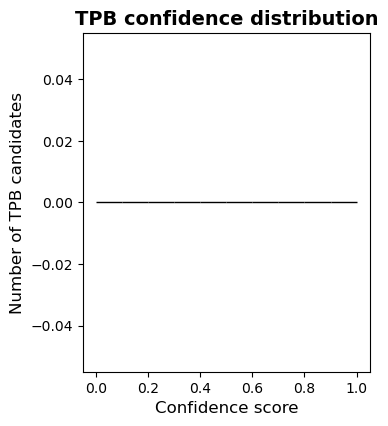

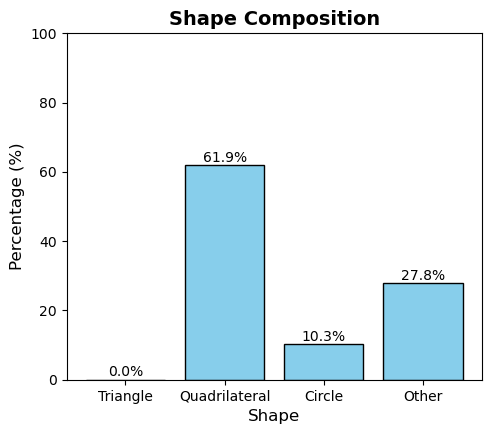

In [85]:
root = tk.Tk()
root.title("PEMFC TPB Recognition System")
root.geometry("1000x700")

# ÂàõÂª∫‰∏Ä‰∏™Âõ∫ÂÆöÂ∞∫ÂØ∏ÁöÑ content_frameÔºåÁî®‰∫éÂ≠òÊîæÂêÑÈ°µÈù¢ÂÜÖÂÆπ
content_frame = tk.Frame(root, width=1000, height=700)
content_frame.pack(expand=True, fill="both")
content_frame.pack_propagate(False)  # Âõ∫ÂÆöÂ∞∫ÂØ∏Ôºå‰∏çËá™Âä®Êâ©Â±ï

# Ê∑ªÂä†Âõ∫ÂÆöÁöÑ User Guide ÊåâÈíÆÔºåÂßãÁªàÊòæÁ§∫Âú®‰∏ªÁ™óÂè£Âè≥‰∏äËßí
def show_user_guide():
    """ÊòæÁ§∫ÂºπÂá∫Âºè User Guide Á™óÂè£ÔºåÊèê‰æõÂ∫îÁî®‰ΩøÁî®ËØ¥Êòé„ÄÇ"""
    guide_win = tk.Toplevel(root)
    guide_win.title("User Guide")
    guide_win.geometry("400x300")
    guide_win.resizable(False, False)
    guide_text = (
        "Welcome to the PEMFC TPB Recognition System!\n\n"
        "1. Click 'Upload Image' to select an image file (JPG, PNG, etc.).\n"
        "2. The system processes the image and displays:\n"
        "   - The original image\n"
        "   - The processed image\n"
        "   - A histogram of TPB confidence distribution\n\n"
        "3. Navigate between pages using the navigation buttons at the bottom:\n"
        "   - Page 2: TPB Analysis Results\n"
        "   - Page 3: Morphology Analysis with annotated shapes and histogram\n"
        "   - Page 4: Reserved for further instructions\n\n"
        "4. A User Guide button is always available at the top right.\n"
        "5. For best results, use a clear, high-resolution image.\n\n"
        "Thank you for using our application!"
    )
    text_widget = tk.Text(guide_win, wrap="word", font=("Arial", 10), bg="white", bd=0)
    text_widget.insert("1.0", guide_text)
    text_widget.config(state="disabled")
    text_widget.pack(expand=True, fill="both", padx=10, pady=10)

user_guide_btn = tk.Button(root, text="User Guide", font=("Arial", 10, "bold"),
                           bg="#4a90e2", fg="white", activebackground="#357ABD", relief="raised", bd=2,
                           command=show_user_guide)
user_guide_btn.place(relx=0.95, rely=0.05, anchor="ne")

# ÊòæÁ§∫ÂàùÂßãÈ°µÈù¢ÔºàPage 1Ôºâ
show_page1()
root.mainloop()